In [2]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import fibretracker as ft


In [3]:
data_path = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/UD-01_FoV_2_B2_recon.txm'
data_path1 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/Mock-01_FoV_2_B2_recon.txm'
data_path2 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/GFRP'
data_path3 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/SCT'
data_path4 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/XCT_LR'

# V_GFRP = ft.io.load(data_path2, contains='.tif')
# V_SRCT = ft.io.load(data_path3, contains='.tif')

# V_XCTLR = ft.io.load(data_path4, contains='.tif')
V_txm1 = ft.io.load(data_path)
# V_txm2 = ft.io.load(data_path1)

V_norm = ft.io.normalize_volume(V_txm1).astype(float)

astropy module not found


In [4]:
# V_tmp = V_norm[100:350, V_norm.shape[1]//2 - 250:V_norm.shape[1]//2 + 250, V_norm.shape[2]//2 - 250:V_norm.shape[2]//2 + 250] # for UD, Mock, XCT_LR

V_tmp = V_norm[:250, V_norm.shape[1]//2 - 250:V_norm.shape[1]//2 + 250, V_norm.shape[2]//2 - 250:V_norm.shape[2]//2 + 250] # for GFRP

# V_tmp = V_norm


In [5]:
ft.viz.slicer(V_norm, img_height=7, img_width=7, cmap='gray')

interactive(children=(IntSlider(value=499, description='Slice', max=998), Output()), layout=Layout(align_items…

In [6]:
ft.viz.orthogonal(V_tmp, img_height=7, img_width=7, cmap='gray')

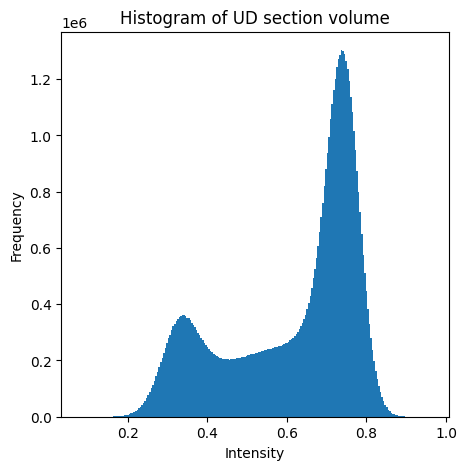

In [8]:
V = V_tmp
n_bins = int(255*(V.max() - V.min()) + 1)
hist, bins = np.histogram(V, bins=n_bins)
bin_width = bins[1] - bins[0]
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.bar(bins[:-1], hist, width=bin_width)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of UD section volume')
plt.show()

In [29]:
coords = ft.models.get_coords(V_tmp, std=2.5, min_distance=3, threshold_abs=0.62)

In [20]:
ft.viz.slicer(V_tmp, detect_coords=coords, mark_size=3, img_height=7, img_width=7, cmap='gray')

interactive(children=(IntSlider(value=100, description='Slice', max=199), Output()), layout=Layout(align_items…

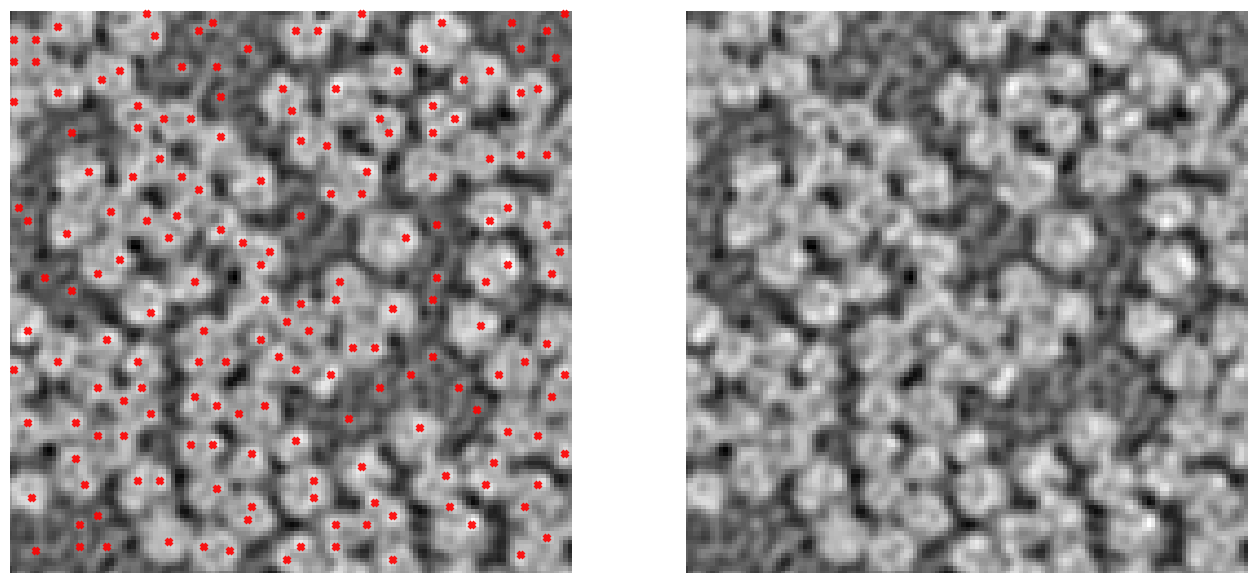

In [15]:
im = V_norm[150]
coord = coords[150]
cropx = 500
cropx1 = 628

cropy = 500
cropy1 = 628
zoomed_img = im[cropx:cropx1, cropy:cropy1]
zoomed_coord = coord[(coord[:, 0] > cropx) & (coord[:, 0] < cropx1) & (coord[:, 1] > cropy) & (coord[:, 1] < cropy1)]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
size = 4
axes[0].axis('off')
axes[0].imshow(zoomed_img, cmap='gray')
axes[0].set_xlim(0, zoomed_img.shape[1])
axes[0].set_ylim(0, zoomed_img.shape[0])
axes[0].plot(zoomed_coord[:,1] - cropy, zoomed_coord[:,0] - cropx, 'rx', markersize=size, alpha=0.9, markeredgewidth=3)

axes[1].axis('off')
axes[1].imshow(zoomed_img, cmap='gray')
axes[1].set_xlim(0, zoomed_img.shape[1])
axes[1].set_ylim(0, zoomed_img.shape[0])
plt.show()

In [32]:
# fibre can be tracked either directly from the volume or from the detected coordinates, or both[to avoid coordinate detection again]

tracks = ft.models.track_fibres(coords=coords)
tracks_gauss = ft.models.track_fibres(V_tmp, coords=coords, smoothtrack_gaussian=True, sigma=2)
tracks_ws = ft.models.track_fibres(V_tmp, coords=coords, smoothtrack_watershed=True, threshold=0.55)

# tracks = ft.models.track_fibres(V_tmp, smoothtrack_watershed=True, threshold=0.5)
# tracks = ft.models.track_fibres(V_tmp, smoothtrack_gaussian=True)
# tracks = ft.models.track_fibres(coords=coords)
# tracks = ft.models.track_fibres(coords=coords, smoothtrack_gaussian=True)



Smoothing tracks using Gaussian       


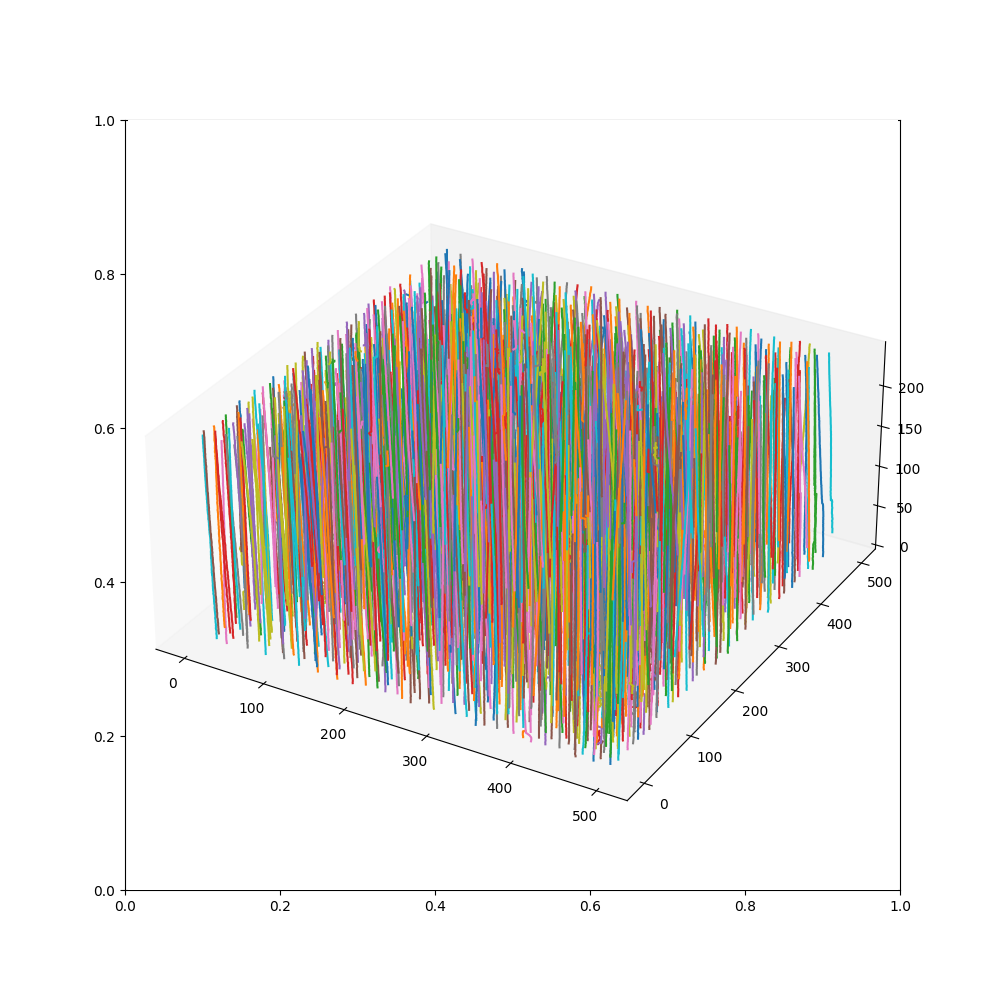

No such comm: e87e7457ee4a4b38a4815661252ab8f2
No such comm: e87e7457ee4a4b38a4815661252ab8f2
No such comm: e87e7457ee4a4b38a4815661252ab8f2
No such comm: e87e7457ee4a4b38a4815661252ab8f2
No such comm: e87e7457ee4a4b38a4815661252ab8f2
No such comm: e87e7457ee4a4b38a4815661252ab8f2


In [19]:
%matplotlib widget
ft.viz.plot_tracks(tracks_ws)

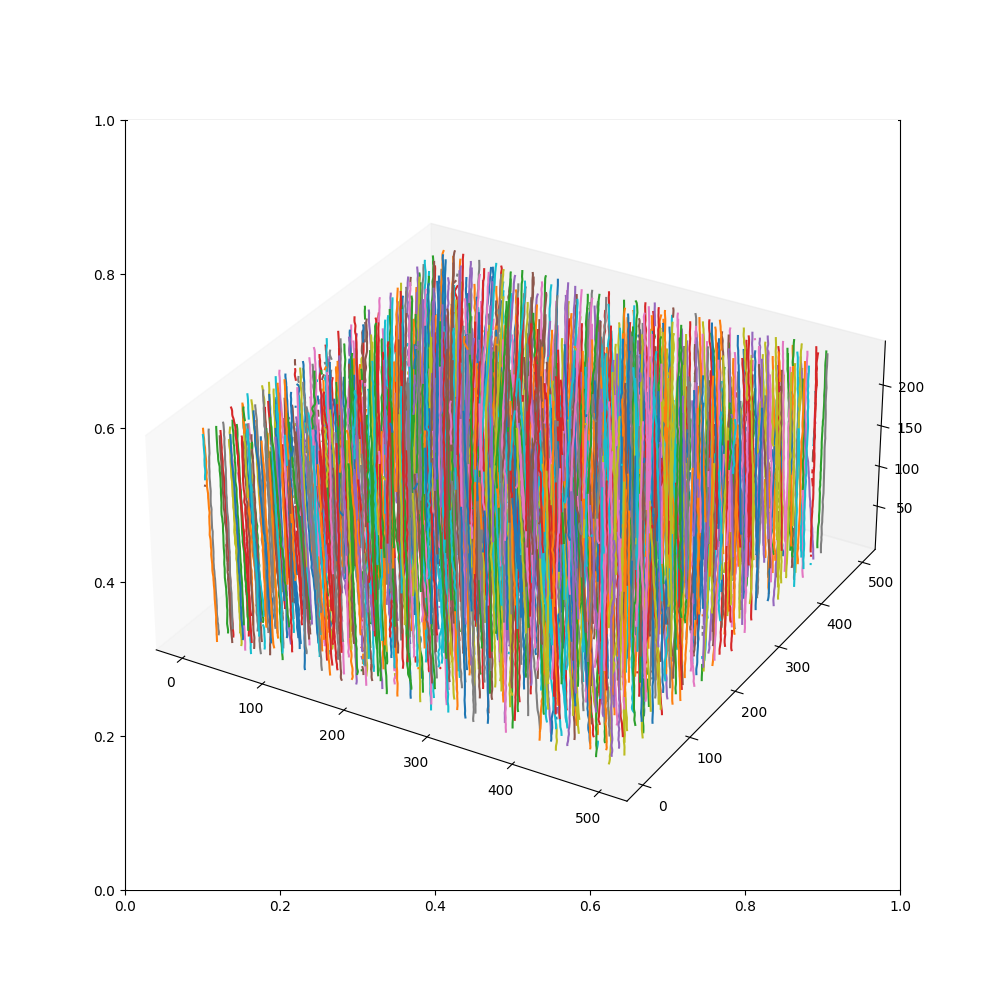

In [33]:
%matplotlib widget
ft.viz.plot_tracks(tracks_gauss)

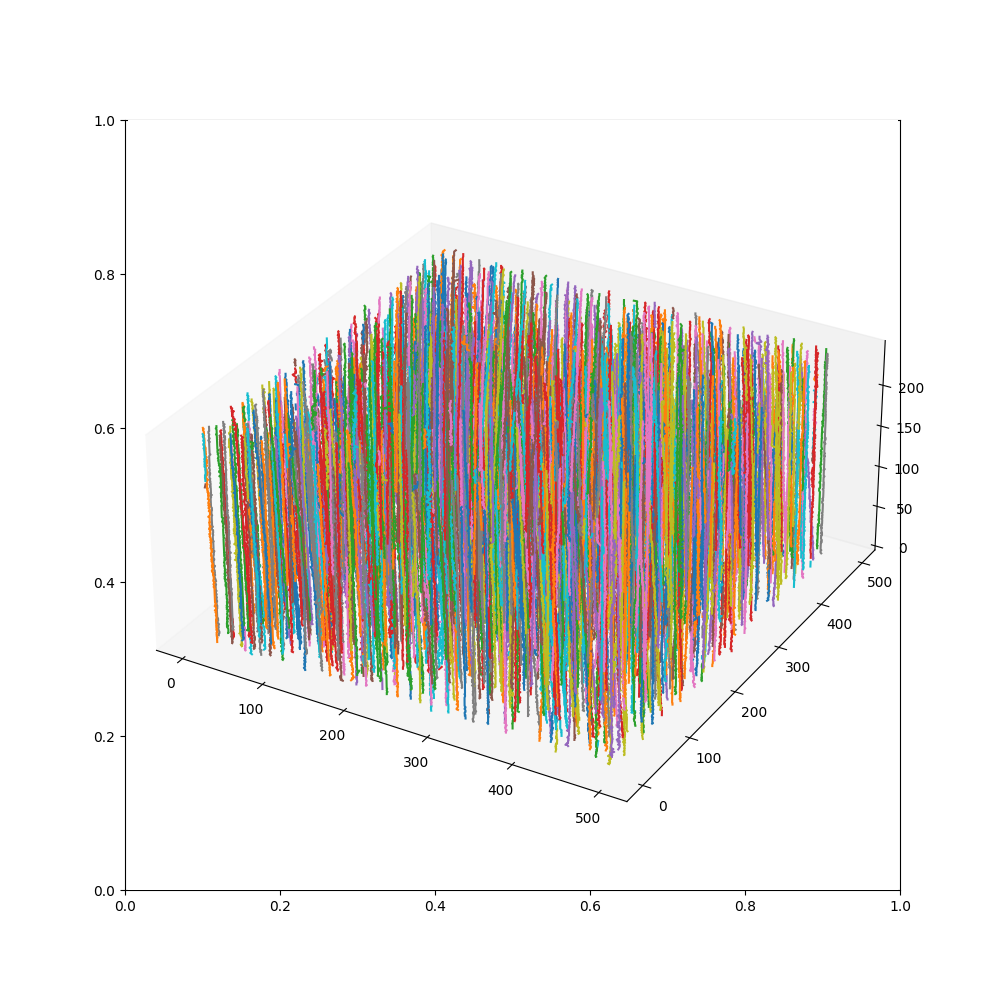

In [34]:
%matplotlib widget
ft.viz.plot_tracks(tracks)